# Final Project: Predicting Rain Tomorrow in Australia

**Name: Andrew Pham**


About Dataset
Context
Predict next-day rain by training classification models on the target variable RainTomorrow.

Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Source & Acknowledgements
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

1. **Data Preprocessing**:

• Perform exploratory data analysis (EDA) to gain insights into the dataset's
structure and distributions.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
# Load the datasets
weatherAUS_X_train = pd.read_csv("weatherAUS_X_train.csv")
weatherAUS_y_train = pd.read_csv("weatherAUS_y_train.csv")

# Display the first few rows of the dataset
weatherAUS = pd.concat([weatherAUS_X_train, weatherAUS_y_train], axis=1) 
print(weatherAUS.head())

# All Variables
print(weatherAUS.columns)

         Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0  2017-04-24            Albany     14.5     17.8      14.2          NaN   
1  2013-10-11         Katherine     24.6     39.5       0.0         12.0   
2  2012-02-18  MelbourneAirport     14.7     26.6       0.2          3.2   
3  2012-02-18       Williamtown     18.3     26.6       0.0          NaN   
4  2011-10-11          Adelaide     11.4     19.3       0.6          2.4   

   Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0       NaN         NaN            NaN        NaN  ...        94.0   
1       NaN          SE           31.0          N  ...        52.0   
2       8.0         SSE           30.0         SW  ...        87.0   
3       NaN          SE           28.0        WSW  ...        79.0   
4       8.9           W           31.0         SW  ...        63.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0          NaN       1024.1       1022.5       8.

In [10]:
# Summary info and stats
print(weatherAUS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116368 entries, 0 to 116367
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           116368 non-null  object 
 1   Location       116368 non-null  object 
 2   MinTemp        115190 non-null  float64
 3   MaxTemp        115370 non-null  float64
 4   Rainfall       113764 non-null  float64
 5   Evaporation    66039 non-null   float64
 6   Sunshine       60426 non-null   float64
 7   WindGustDir    108118 non-null  object 
 8   WindGustSpeed  108166 non-null  float64
 9   WindDir9am     107939 non-null  object 
 10  WindDir3pm     112971 non-null  object 
 11  WindSpeed9am   114960 non-null  float64
 12  WindSpeed3pm   113911 non-null  float64
 13  Humidity9am    114251 non-null  float64
 14  Humidity3pm    112752 non-null  float64
 15  Pressure9am    104307 non-null  float64
 16  Pressure3pm    104326 non-null  float64
 17  Cloud9am       71611 non-null

In [11]:
# Summary statistics
print("Dataset Distribution")
print(weatherAUS.describe())

Dataset Distribution
            MinTemp        MaxTemp       Rainfall   Evaporation      Sunshine  \
count  115190.00000  115370.000000  113764.000000  66039.000000  60426.000000   
mean       12.19708      23.219542       2.378870      5.465219      7.612980   
std         6.39974       7.117535       8.537384      4.195541      3.785258   
min        -8.50000      -4.800000       0.000000      0.000000      0.000000   
25%         7.60000      17.900000       0.000000      2.600000      4.800000   
50%        12.00000      22.600000       0.000000      4.800000      8.400000   
75%        16.90000      28.200000       0.800000      7.400000     10.600000   
max        31.90000      47.300000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  108166.000000  114960.000000  113911.000000  114251.000000   
mean       40.036056      14.052157      18.663492      68.908062   
std        13.631077       8.918674       

<Axes: xlabel='RainTomorrow'>

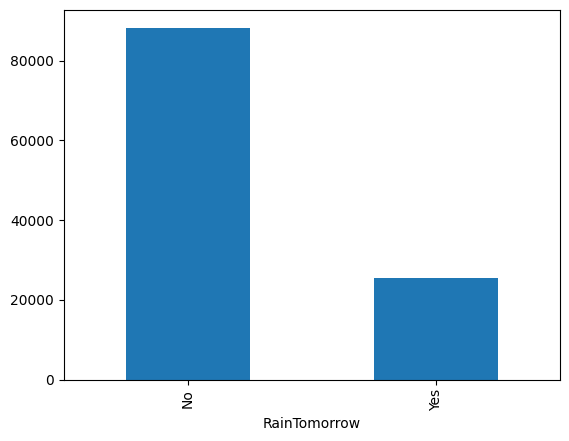

In [12]:
# RainTomorrow Graph
weatherAUS_y_train['RainTomorrow'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

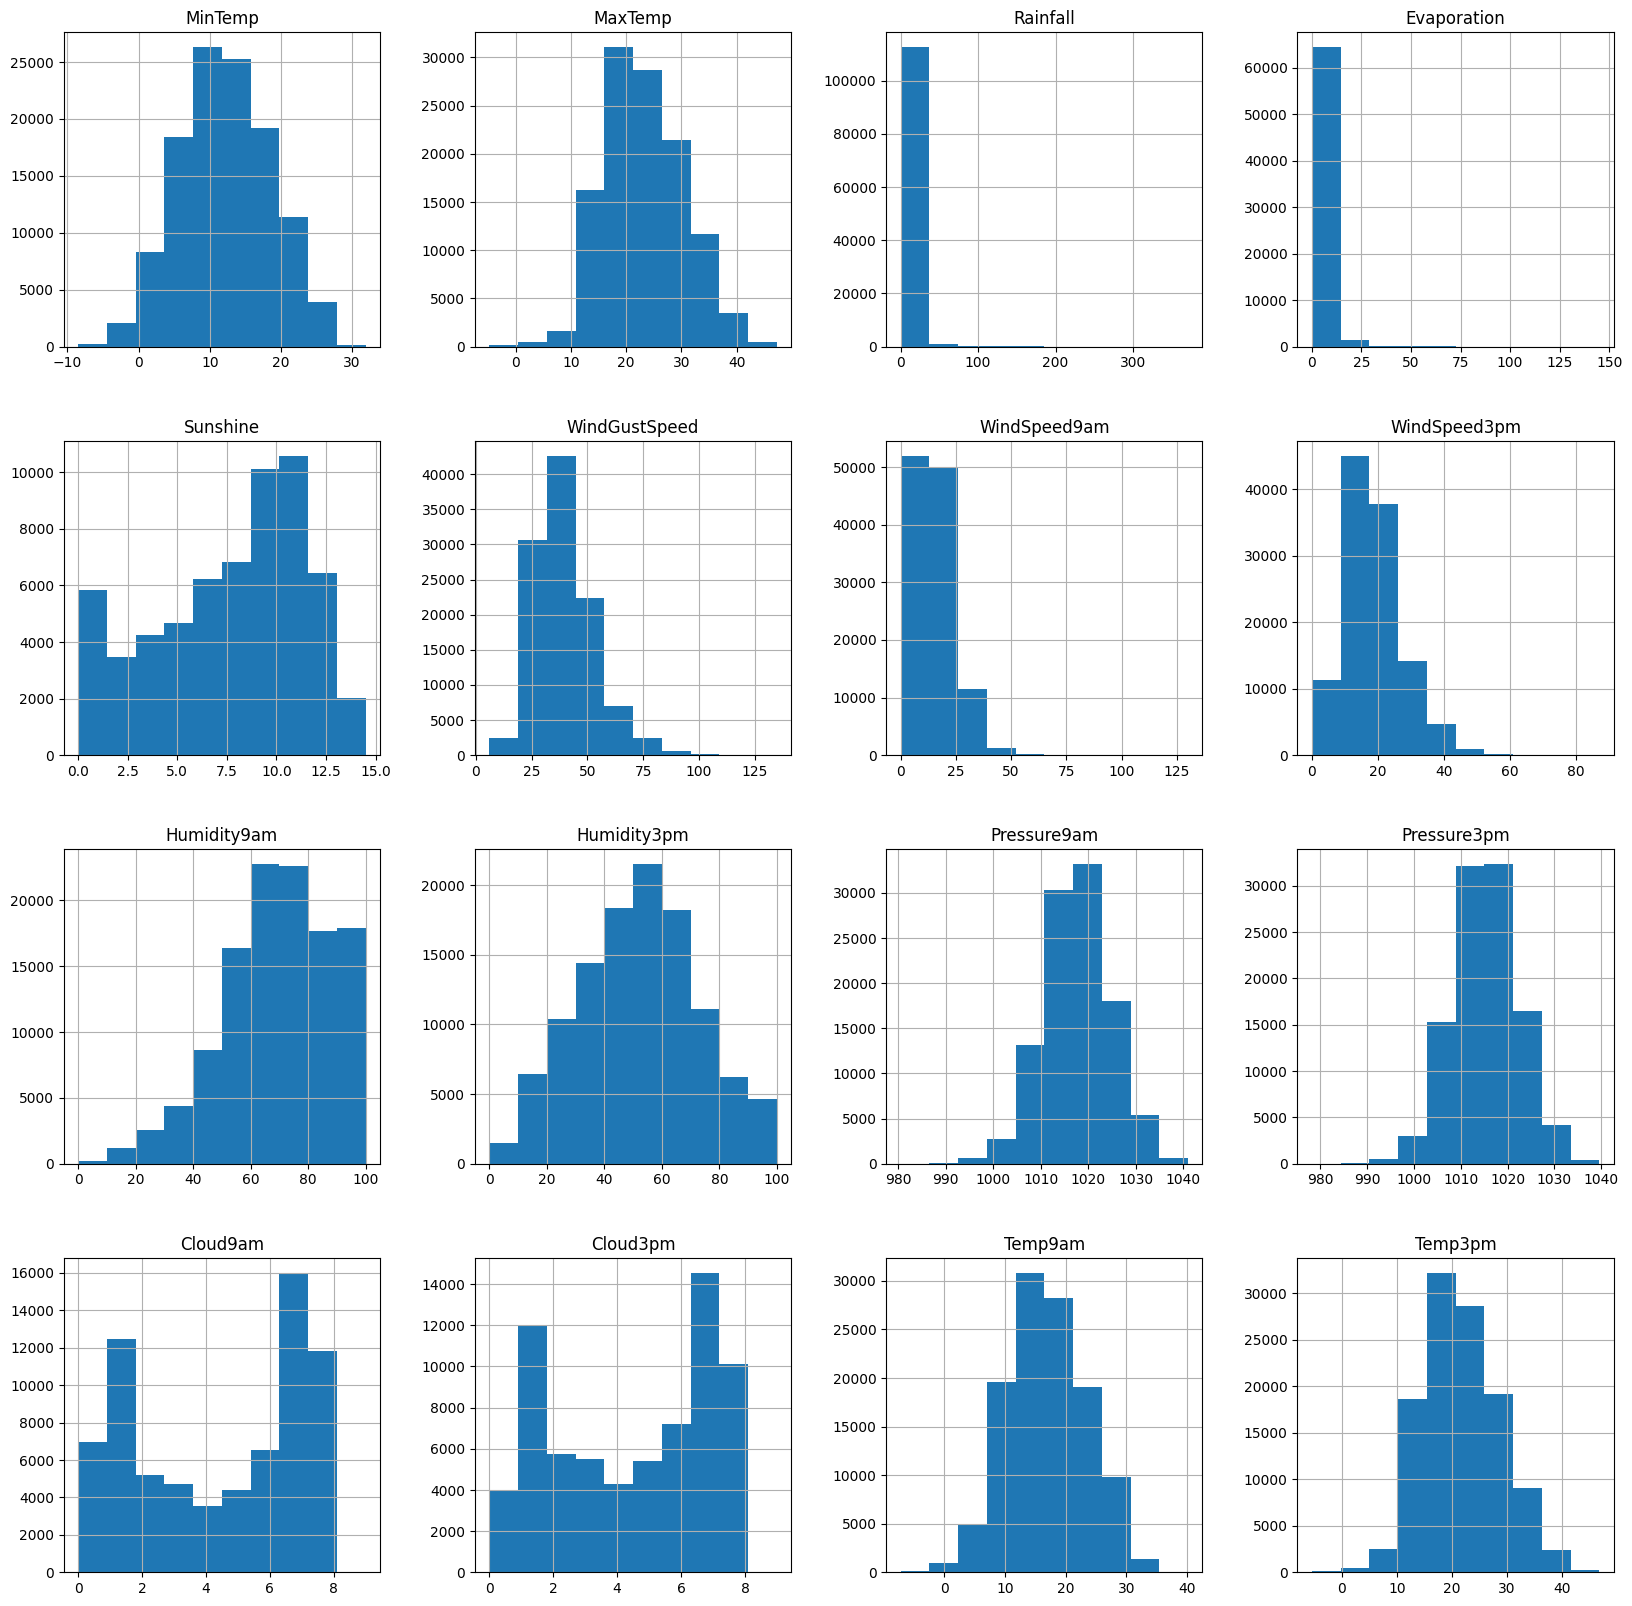

In [13]:
# Histograms
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
weatherAUS[num_features].hist(bins=10,figsize=(20,20))

• Handle missing values, outliers, and any inconsistencies in the data.

In [14]:
# Categorical variables:
categorical_variables = [column_name for column_name in weatherAUS_X_train.columns if weatherAUS_X_train[column_name].dtype == 'O']
print("Number of Categorical Variables: {}".format(len(categorical_variables)))
print("Categorical Variables: ",categorical_variables)

# Numerical Features:
numerical_features = [column_name for column_name in weatherAUS_X_train.columns if weatherAUS_X_train[column_name].dtype != 'O']
print("\nNumber of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

# Type conversion of Date Column to datetime type:
weatherAUS_proc = weatherAUS_X_train.copy()
weatherAUS_proc['Date'] = pd.to_datetime(weatherAUS_proc['Date'])
weatherAUS_proc['year'] = weatherAUS_proc['Date'].dt.year
weatherAUS_proc['month'] = weatherAUS_proc['Date'].dt.month
weatherAUS_proc['day'] = weatherAUS_proc['Date'].dt.day
weatherAUS_proc.drop('Date', axis = 1, inplace = True)
weatherAUS_proc.head()

categorical_variables = [column_name for column_name in weatherAUS_proc.columns if weatherAUS_proc[column_name].dtype == 'O']

numerical_features = [column_name for column_name in weatherAUS_proc.columns if weatherAUS_proc[column_name].dtype != 'O']

# list of categorical features which has null values:
categorical_features_with_null = [feature for feature in categorical_variables if weatherAUS_proc[feature].isnull().sum()]
# Filling null numerical values using mode
for each_feature in categorical_features_with_null:
    mode_val = weatherAUS_proc[each_feature].mode()[0]
    weatherAUS_proc[each_feature].fillna(mode_val,inplace=True)

# Features which has outliers:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Replacing outliers using IQR:
for feature in features_with_outliers:
    q1 = weatherAUS_proc[feature].quantile(0.25)
    q3 = weatherAUS_proc[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    weatherAUS_proc.loc[weatherAUS_proc[feature]<lower_limit,feature] = lower_limit
    weatherAUS_proc.loc[weatherAUS_proc[feature]>upper_limit,feature] = upper_limit

# List of numerical features which has null values
numerical_features_with_null = [feature for feature in numerical_features if weatherAUS_proc[feature].isnull().sum()]
# Filling null numerical values using mean
for feature in numerical_features_with_null:
    mean_value = weatherAUS_proc[feature].mean()
    weatherAUS_proc[feature].fillna(mean_value,inplace=True)

weatherAUS_y_proc = weatherAUS_y_train.copy()
categorical_variables_y = [column_name for column_name in weatherAUS_y_proc.columns if weatherAUS_y_proc[column_name].dtype == 'O']
categorical_features_with_null_y = [feature for feature in categorical_variables_y if weatherAUS_y_proc[feature].isnull().sum()]
for each_feature in categorical_features_with_null_y:
    mode_val = weatherAUS_y_proc[each_feature].mode()[0]
    weatherAUS_y_proc[each_feature].fillna(mode_val,inplace=True)


Number of Categorical Variables: 6
Categorical Variables:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


• Encode categorical variables and normalize numerical features as necessary.

In [15]:
categorical_variables

# Encoding Categorical Features using replace function:
weatherAUS_proc['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
weatherAUS_y_proc['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)
weatherAUS = pd.concat([weatherAUS_proc, weatherAUS_y_proc], axis=1)

def encode_data(feature_name):
    ''' 
     function which takes feature name as a parameter and return mapping dictionary to replace(or map) categorical data 
     to numerical data.
    '''
    mapping_dict = {}
    unique_values = list(weatherAUS[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

weatherAUS['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)
weatherAUS['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)
weatherAUS['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)
weatherAUS['Location'].replace(encode_data('Location'), inplace = True)

print(weatherAUS.head())

{'W': 0, 'SE': 1, 'SSE': 2, 'N': 3, 'ENE': 4, 'NW': 5, 'SSW': 6, 'SW': 7, 'ESE': 8, 'S': 9, 'NNW': 10, 'NNE': 11, 'E': 12, 'WSW': 13, 'WNW': 14, 'NE': 15}
{'N': 0, 'SW': 1, 'WSW': 2, 'SSW': 3, 'ESE': 4, 'NW': 5, 'NNE': 6, 'E': 7, 'ENE': 8, 'SSE': 9, 'WNW': 10, 'W': 11, 'SE': 12, 'NNW': 13, 'S': 14, 'NE': 15}
{'SE': 0, 'NW': 1, 'S': 2, 'SSE': 3, 'SSW': 4, 'W': 5, 'NNW': 6, 'E': 7, 'ESE': 8, 'SW': 9, 'ENE': 10, 'NNE': 11, 'N': 12, 'WSW': 13, 'NE': 14, 'WNW': 15}
{'Albany': 0, 'Katherine': 1, 'MelbourneAirport': 2, 'Williamtown': 3, 'Adelaide': 4, 'Nuriootpa': 5, 'Albury': 6, 'Mildura': 7, 'Launceston': 8, 'Townsville': 9, 'Cobar': 10, 'Uluru': 11, 'Brisbane': 12, 'Darwin': 13, 'Melbourne': 14, 'Portland': 15, 'Cairns': 16, 'Sydney': 17, 'Sale': 18, 'Dartmoor': 19, 'AliceSprings': 20, 'Woomera': 21, 'MountGinini': 22, 'Ballarat': 23, 'NorahHead': 24, 'Tuggeranong': 25, 'PearceRAAF': 26, 'MountGambier': 27, 'Perth': 28, 'Walpole': 29, 'WaggaWagga': 30, 'Newcastle': 31, 'Hobart': 32, 'Sydne

• Split the dataset into training and testing sets, ensuring a proper balance of
classes.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from pgmpy.models import BayesianNetwork
from sklearn.metrics import accuracy_score

# Spliting data into input features and label
X = weatherAUS.drop(['RainTomorrow'],axis=1)
y = weatherAUS['RainTomorrow']

# Split the dataset into training and testing sets with 20% test and 80% training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2. **Model Design and Training**:

• Implement various classification algorithms including Decision Trees, Support
Vector Machines (SVM), Multi-layer Perceptron (MLP), Logistic Regression,
Naïve Bayes and ensemble methods such as Bagging, AdaBoost, Random
Forest or XGBoost (You can choose one ensemble method to implement).\
• Train each model on the training dataset and evaluate their performance using appropriate metrics.

In [187]:
# Decision Trees
# Train a decision tree classifier with a maximum depth of 20
clf = DecisionTreeClassifier(max_depth=20)

# Evaluate the classifier on the training set
# Predict response for train dataset
clf = clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
print("Accuracy Score of Classifier on the Training Set:",accuracy_score(y_train, y_train_pred))

# Evaluate the classifier on the testing set
#You code starts here
# Predict response for test dataset
y_test_pred = clf.predict(X_test)
print("Accuracy Score of Classifier on the Test Set:",accuracy_score(y_test, y_test_pred))

# Standardizing the features
## Your code starts here
scaler = StandardScaler()
scaler.fit(weatherAUS)
X_train_scaled = scaler.fit_transform(X_train)
# Transform the testing data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)
## Your code ends here

Accuracy Score of Classifier on the Training Set: 0.9782048252304123
Accuracy Score of Classifier on the Test Set: 0.7964251954971212


In [190]:
# Support Vector Machines (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = linear_SVM.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Linear SVM Accuracy:", svm_accuracy)

Linear SVM Accuracy: 0.8441608662026295


In [214]:
# Multi-layer Perceptron (MLP)

# Initialize MLP classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the classifier
mlp_clf.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = mlp_clf.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Multi-layer Perceptron Classifier Accuracy:", accuracy)

Multi-layer Perceptron Classifier Accuracy: 0.8497035318381027


In [195]:
# Logistic Regression
# start_time = time.time()
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)
# end_time = time.time()
# print("Time Taken to train: {}".format(end_time - start_time))

# Accuracy Score
y_pred = classifier_logreg.predict(X_test)
print("Logistic Regression Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Logistic Regression Accuracy: 0.8434734037982298


In [194]:
# Naive Bayes
# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the classifier on the scaled training data
nb_model.fit(X_train_scaled, y_train)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 0.8434734037982298


In [213]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Accuracy Score
rf_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8434734037982298


3. **Model Improvements**:

Try different model improvement techniques to enhance the performance of your
models. The following are some suggestions. Try to apply at least one technique
to improve the performance of each model. For this part, you can even explore
more techniques by reading some research papers. Try to find research papers
that leverage model improvement techniques on a sample binary classification
problem. This is the part that you can go further and do research work of your
own. Good quality works with enough contributions will be selected for
conference publications

**Hyperparameter Tuning**:

i. Implement hyperparameter tuning techniques such as GridSearchCV or
RandomizedSearchCV to systematically search for the optimal
combination of hyperparameters.\
ii. You need to tune hyperparameters specific to each model algorithm,
such as the maximum depth of decision trees, the kernel type in SVM,
or the number of hidden layers and neurons in MLP and etc.

In [212]:
# DECISION TREE

# Define parameter distributions
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Randomized search
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_dt_model = random_search.best_estimator_

# Evaluate the best model
y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Hyperparameter Tuning Accuracy (Decision Tree):", accuracy_dt)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3}
Hyperparameter Tuning Accuracy (Decision Tree): 0.8390048981696313


In [219]:
# SVM

# Define parameter distributions
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': [False]
}

# Instantiate the LinearSVC classifier
svc_classifier = LinearSVC()

# Grid search
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_svc_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_svc = best_svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Hyperparameter Tuning Accuracy (SVM):", accuracy_svc)

C:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\andre\AppDa

Best Parameters: {'C': 0.001, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2'}
Hyperparameter Tuning Accuracy (SVM): 0.8418836469880553


In [ ]:
# Logistic Regression

# Define Logistic Regression classifier
logistic_regression = LogisticRegression()

# Define hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model
best_lr_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_lr = best_lr_model.predict(X_test)
print("Hyperparameter Tuning Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))

In [204]:
# Random Forest Classifier

# Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
# Hyperparameter Tuning Accuracy: 0.8552461974735757

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the model
rf = RandomForestClassifier()

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred_gs = best_model.predict(X_test)
accuracy_gs = accuracy_score(y_test, y_pred_gs)
print("Hyperparameter Tuning Accuracy:", accuracy_gs)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Hyperparameter Tuning Accuracy: 0.8552461974735757


NameError: name 'evaluate' is not defined

**Feature Selection**:

i. Explore feature selection methods such as Recursive Feature
Elimination (RFE), feature importance ranking, or model-based
selection techniques.\
ii. You will need to identify and retain only the most informative features
to improve model performance and reduce overfitting.

In [200]:
# Instantiate the model
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(model, n_features_to_select=10)

# Fit RFE
rfe.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Transform the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the model using selected features
rf.fit(X_train_rfe, y_train)

# Evaluate the model
y_pred_rfe = rf.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print("RFE Feature Selection Accuracy:", accuracy_rfe)

Selected Features: Index(['MinTemp', 'MaxTemp', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')
RFE Feature Selection Accuracy: 0.8472114806221535


**Model Fusion**:

i. Explore techniques for model fusion or model averaging to combine
predictions from multiple models.\
ii. You will need to weight individual model predictions based on their
performance or confidence levels to improve the final prediction
accuracy.

In [198]:
# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'MLP': MLPClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
}

# Train classifiers
trained_classifiers = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    trained_classifiers[name] = clf

# Get predictions for each classifier
predictions = {}
for name, clf in trained_classifiers.items():
    predictions[name] = clf.predict_proba(X_test_scaled)[:, 1]  # Use predicted probabilities

# Calculate weights based on performance (accuracy)
weights = {}
for name, probas in predictions.items():
    accuracy = accuracy_score(y_test, (probas > 0.5).astype(int))
    weights[name] = accuracy

# Normalize weights
total_weight = sum(weights.values())
normalized_weights = {name: weight / total_weight for name, weight in weights.items()}

# Weighted averaging of predictions
weighted_average = None
for name, probas in predictions.items():
    if weighted_average is None:
        weighted_average = probas * normalized_weights[name]
    else:
        weighted_average += probas * normalized_weights[name]

# Convert probabilities to binary predictions
final_predictions = (weighted_average > 0.5).astype(int)

# Final accuracy
final_accuracy = accuracy_score(y_test, final_predictions)
print("Final Accuracy after Model Fusion:", final_accuracy)

Final Accuracy after Model Fusion: 0.8506917590444273


**Regularization Techniques**:

i. Explore regularization techniques such as L1 (Lasso) and L2 (Ridge)
regularization to control model complexity and prevent overfitting.\
ii. You will need to incorporate regularization into your models to
improve generalization ability and robustness.

In [202]:
# L1 regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_lasso = lasso_model.predict(X_test_scaled)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
print("Accuracy with L1 (Lasso) regularization:", accuracy_lasso)

# L2 regularization (Ridge)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear')
ridge_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_ridge = ridge_model.predict(X_test_scaled)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print("Accuracy with L2 (Ridge) regularization:", accuracy_ridge)

Accuracy with L1 (Lasso) regularization: 0.8443756982040045
Accuracy with L2 (Ridge) regularization: 0.8443327318037295


4. **Model Comparison and Interpretation**:

• Compare the performance of different models based on evaluation metrics
such as accuracy, precision, recall, and F1-score in the context of binary
classification. You can use model performance metrics, such as ROC curves,
and confusion matrices.\
• Analyze the strengths and weaknesses of each model in terms of predictive
capability and computational efficiency.\
• Interpret the final results to understand the impact of various features on
predicting rainfall, providing insights into potential patterns and correlations.
For example, you can use feature importance scores from tree-based models
and how they relate to the problem domain.

Evaluating Decision Tree:


C:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


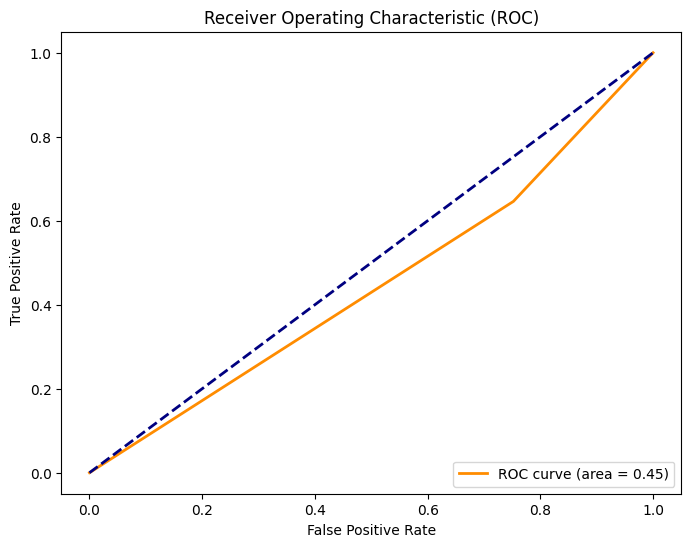

Confusion Matrix:
[[ 4506 13677]
 [ 1802  3289]]


Accuracy: 0.33
Precision: 0.19
Recall: 0.65
F1-score: 0.30
ROC AUC: 0.45


Evaluating Random Forest:


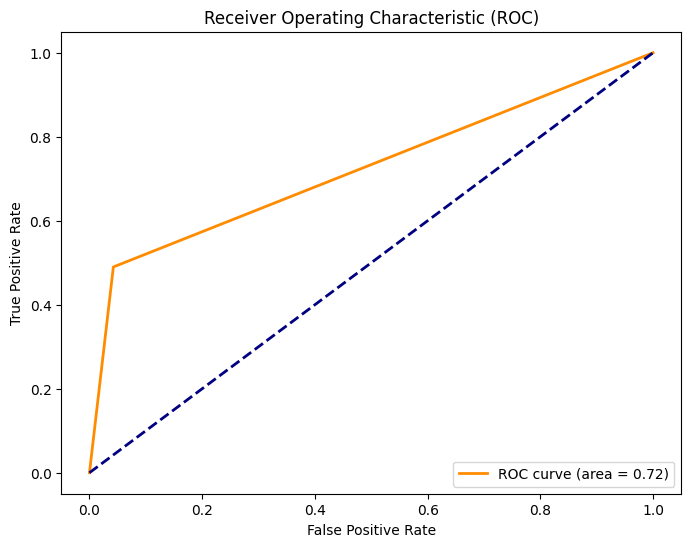

Confusion Matrix:
[[17412   771]
 [ 2597  2494]]


Accuracy: 0.86
Precision: 0.76
Recall: 0.49
F1-score: 0.60
ROC AUC: 0.72


Evaluating Multi-layer Perceptron:


C:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


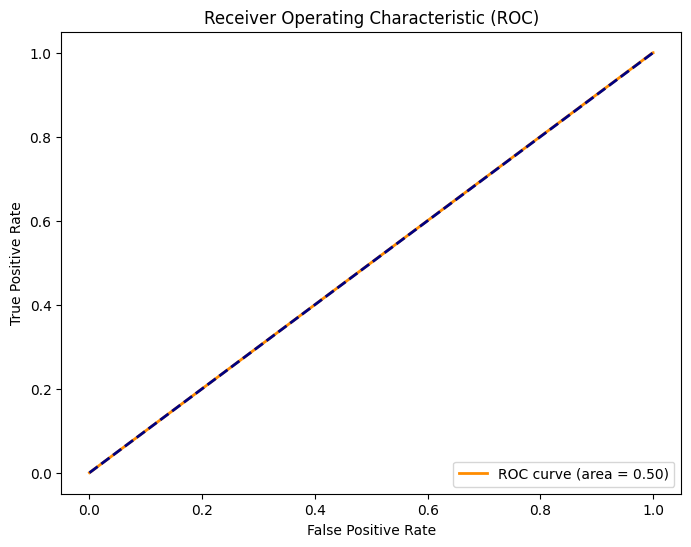

Confusion Matrix:
[[   14 18169]
 [    1  5090]]


Accuracy: 0.22
Precision: 0.22
Recall: 1.00
F1-score: 0.36
ROC AUC: 0.50


Evaluating SVM:


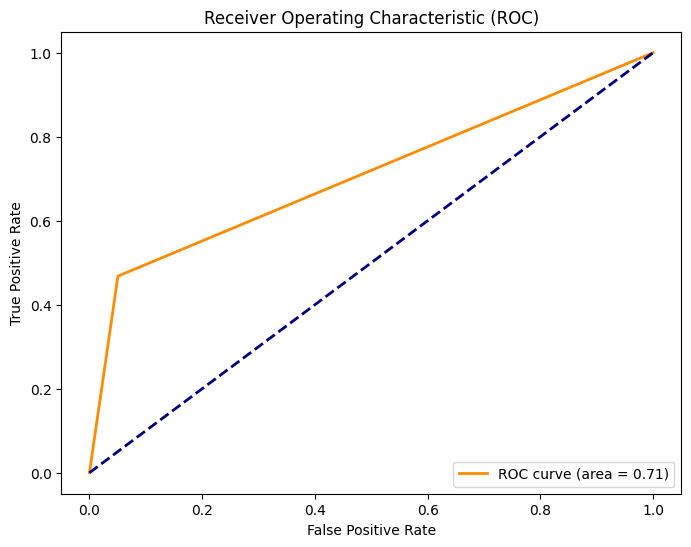

Confusion Matrix:
[[17264   919]
 [ 2708  2383]]


Accuracy: 0.84
Precision: 0.72
Recall: 0.47
F1-score: 0.57
ROC AUC: 0.71


Evaluating Naive Bayes:


C:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


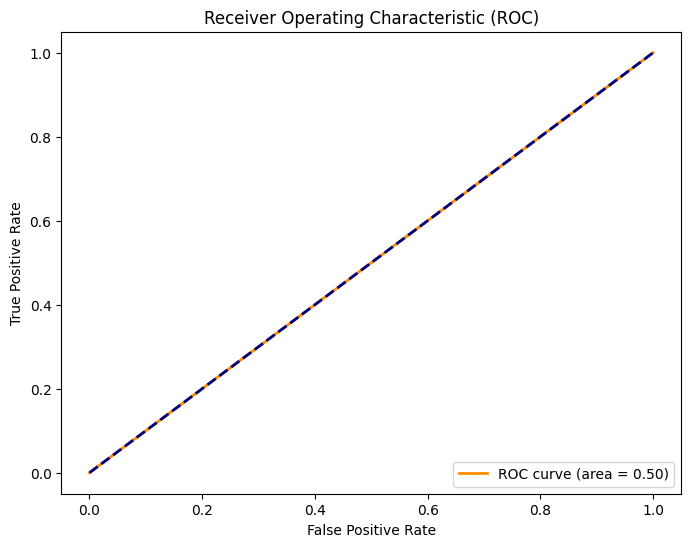

Confusion Matrix:
[[    0 18183]
 [    0  5091]]


Accuracy: 0.22
Precision: 0.22
Recall: 1.00
F1-score: 0.36
ROC AUC: 0.50


Evaluating Logistic Regression:


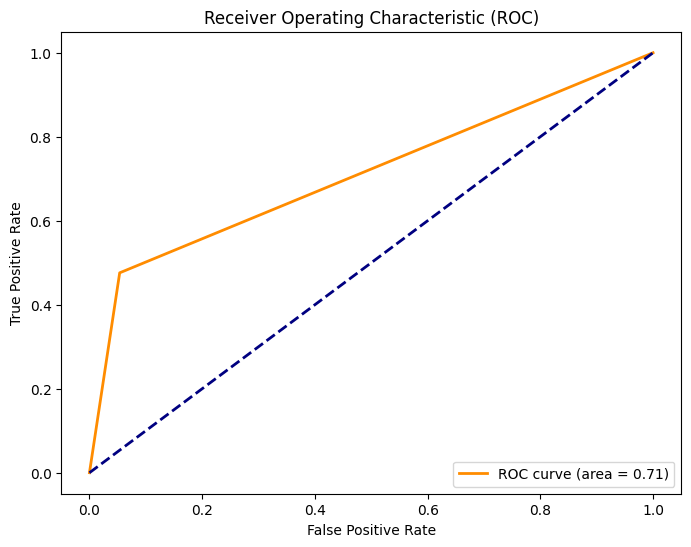

Confusion Matrix:
[[17208   975]
 [ 2668  2423]]


Accuracy: 0.84
Precision: 0.71
Recall: 0.48
F1-score: 0.57
ROC AUC: 0.71




In [207]:
# Assuming models have been trained and predictions are available
models = [clf, rf_model, mlp_clf, svm_model, nb_model, classifier_logreg]
model_names = ['Decision Tree', 'Random Forest', 'Multi-layer Perceptron', 'SVM', 'Naive Bayes', 'Logistic Regression']

# Evaluate Model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)

    # Plot Each ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Confustion Matrix
    print("Confusion Matrix:")
    print(cm)
    print("\n")

    # Performance Metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")

for model, name in zip(models, model_names):
    print(f"Evaluating {name}:")
    evaluate_model(model, X_test, y_test)
    print("\n")